In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Load the data

In [25]:
from tensorflow.keras.datasets import cifar10
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [26]:
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 1)
X_test shape: (10000, 32, 32, 3)
y_test shape: (10000, 1)


Data Visualization

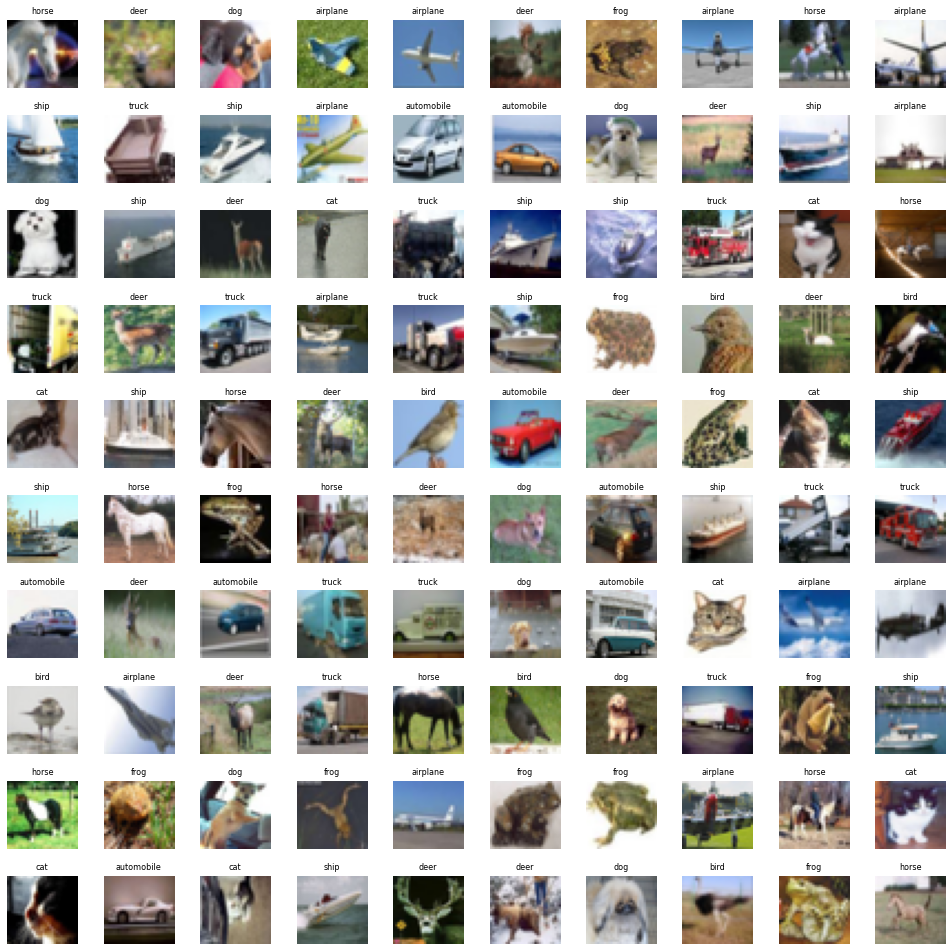

In [27]:
# Define the labels of the dataset
labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 
          'dog', 'frog', 'horse', 'ship', 'truck']
W_grid = 10
L_grid = 10
fig, axes = plt.subplots(L_grid, W_grid, figsize = (17,17))
axes = axes.ravel() 
n_train = len(X_train) 
for i in np.arange(0, W_grid * L_grid):
    index = np.random.randint(0, n_train)
    axes[i].imshow(X_train[index,1:])
    label_index = int(y_train[index])
    axes[i].set_title(labels[label_index], fontsize = 8)
    axes[i].axis('off')
plt.subplots_adjust(hspace=0.4)

Text(0.5, 1.0, 'Class distribution in training set')

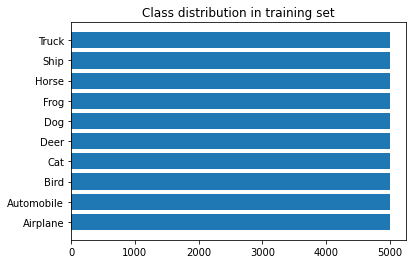

In [28]:
classes_name = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

classes, counts = np.unique(y_train, return_counts=True)
plt.barh(classes_name, counts)
plt.title('Class distribution in training set')

Text(0.5, 1.0, 'Class distribution in testing set')

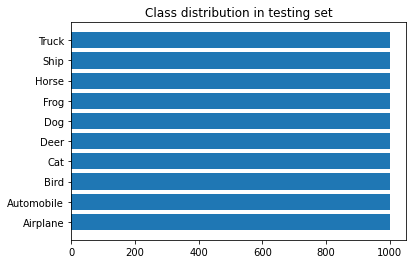

In [29]:
classes, counts = np.unique(y_test, return_counts=True)
plt.barh(classes_name, counts)
plt.title('Class distribution in testing set')

The class are equally distributed

Data Preprocessing

In [30]:
X_train = X_train / 255
X_test = X_test / 255

In [31]:
from tensorflow.keras.utils import to_categorical

In [32]:
y_cat_train = to_categorical(y_train, 10)
y_cat_test = to_categorical(y_test, 10)

In [33]:
y_cat_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

DenseNet model for image classification

In [34]:
from keras.applications.densenet import DenseNet121
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense
from keras.models import Sequential

model = Sequential()
base_model = DenseNet121(input_shape=(32, 32, 3), include_top=False, weights='imagenet', pooling='avg')
model.add(base_model)
model.add(Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

batch_size = 32
data_generator = ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
train_generator = data_generator.flow(X_train, y_cat_train, batch_size)
steps_per_epoch = X_train.shape[0] // batch_size


r = model.fit(train_generator, 
              epochs=100,
              steps_per_epoch=steps_per_epoch,
              validation_data=(X_test, y_cat_test)
             )

Epoch 1/100
1562/1562 [==============================] - 88s 50ms/step - loss: 1.5027 - accuracy: 0.4925 - val_loss: 1.4059 - val_accuracy: 0.6098
Epoch 2/100
1562/1562 [==============================] - 76s 49ms/step - loss: 1.0655 - accuracy: 0.6448 - val_loss: 9.2154 - val_accuracy: 0.2872
Epoch 3/100
1562/1562 [==============================] - 77s 49ms/step - loss: 1.2061 - accuracy: 0.6024 - val_loss: 0.8042 - val_accuracy: 0.7262
Epoch 4/100
1562/1562 [==============================] - 78s 50ms/step - loss: 0.8319 - accuracy: 0.7192 - val_loss: 1.3791 - val_accuracy: 0.6959
Epoch 5/100
1562/1562 [==============================] - 77s 49ms/step - loss: 1.3205 - accuracy: 0.5524 - val_loss: 7.4556 - val_accuracy: 0.6270
Epoch 6/100
1562/1562 [==============================] - 76s 49ms/step - loss: 1.2070 - accuracy: 0.5894 - val_loss: 0.9306 - val_accuracy: 0.6873
Epoch 7/100
1562/1562 [==============================] - 76s 49ms/step - loss: 0.8708 - accuracy: 0.7006 - val_loss: 0

In [36]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
densenet121 (Functional)     (None, 1024)              7037504   
_________________________________________________________________
dense_3 (Dense)              (None, 10)                10250     
Total params: 7,047,754
Trainable params: 6,964,106
Non-trainable params: 83,648
_________________________________________________________________


In [37]:
evaluation = model.evaluate(X_test, y_cat_test)
print(f'Test Accuracy : {evaluation[1] * 100:.2f}%')

313/313 [==============================] - 4s 12ms/step - loss: 0.5360 - accuracy: 0.8701
Test Accuracy : 87.01%


In [38]:
from sklearn.metrics import classification_report, confusion_matrix
y_pred = model.predict_classes(X_test)
cm = confusion_matrix(y_test, y_pred)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [40]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.87      0.89      1000
           1       0.91      0.96      0.94      1000
           2       0.88      0.79      0.83      1000
           3       0.74      0.75      0.75      1000
           4       0.86      0.87      0.86      1000
           5       0.81      0.78      0.80      1000
           6       0.87      0.94      0.90      1000
           7       0.87      0.91      0.89      1000
           8       0.94      0.91      0.92      1000
           9       0.91      0.92      0.92      1000

    accuracy                           0.87     10000
   macro avg       0.87      0.87      0.87     10000
weighted avg       0.87      0.87      0.87     10000



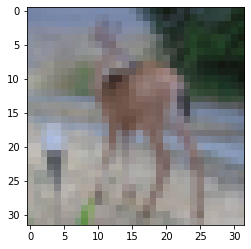

In [41]:
my_image = X_test[100]
plt.imshow(my_image)

In [42]:
# that's a Deer
y_test[100]

array([4], dtype=uint8)

In [44]:
# correctly predicted as a Deer
model.predict_classes(my_image.reshape(1, 32, 32, 3))

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([4])

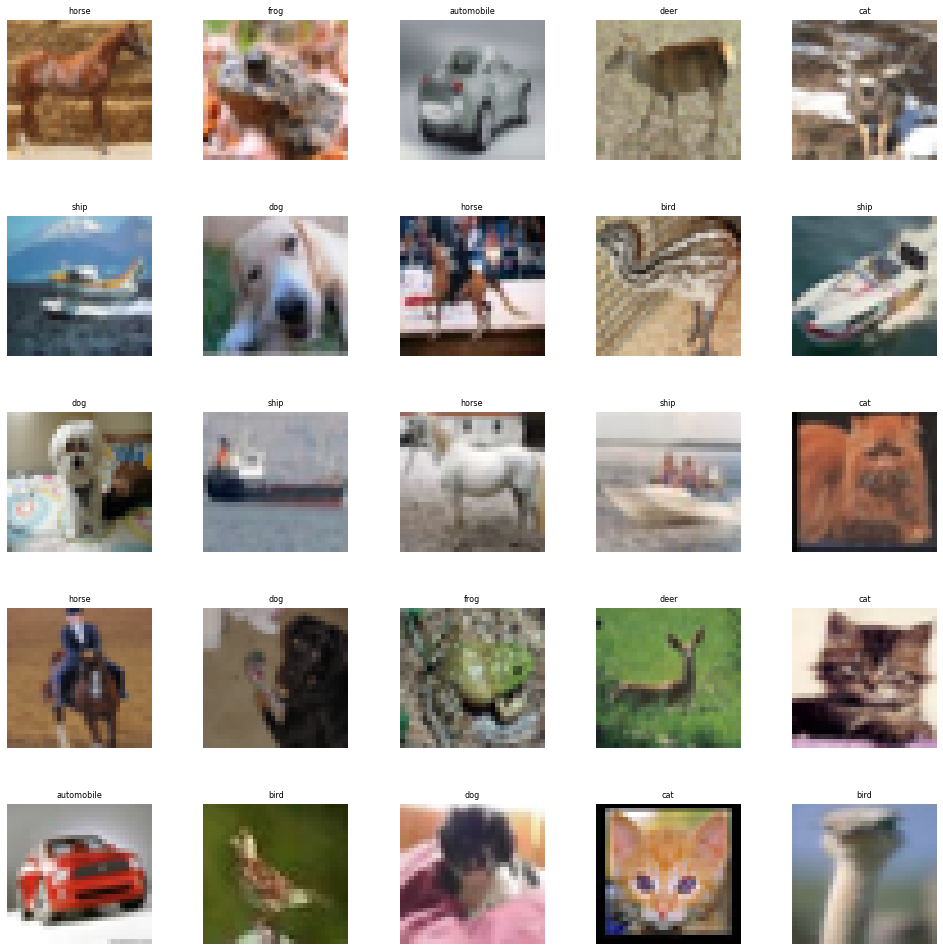

In [45]:
# Define the labels of the dataset
labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 
          'dog', 'frog', 'horse', 'ship', 'truck']
W_grid = 5
L_grid = 5
fig, axes = plt.subplots(L_grid, W_grid, figsize = (17,17))
axes = axes.ravel()
n_test = len(X_test)
for i in np.arange(0, W_grid * L_grid):
    index = np.random.randint(0, n_test)
    axes[i].imshow(X_test[index,1:])
    label_index = int(y_pred[index])
    axes[i].set_title(labels[label_index], fontsize = 8)
    axes[i].axis('off')
plt.subplots_adjust(hspace=0.4)

In [46]:
predictions = model.predict(X_test)

In [47]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array, true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel(f"{labels[int(predicted_label)]} {100*np.max(predictions_array):2.0f}% ({labels[int(true_label)]})", 
               color=color)

def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array, int(true_label[i])
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

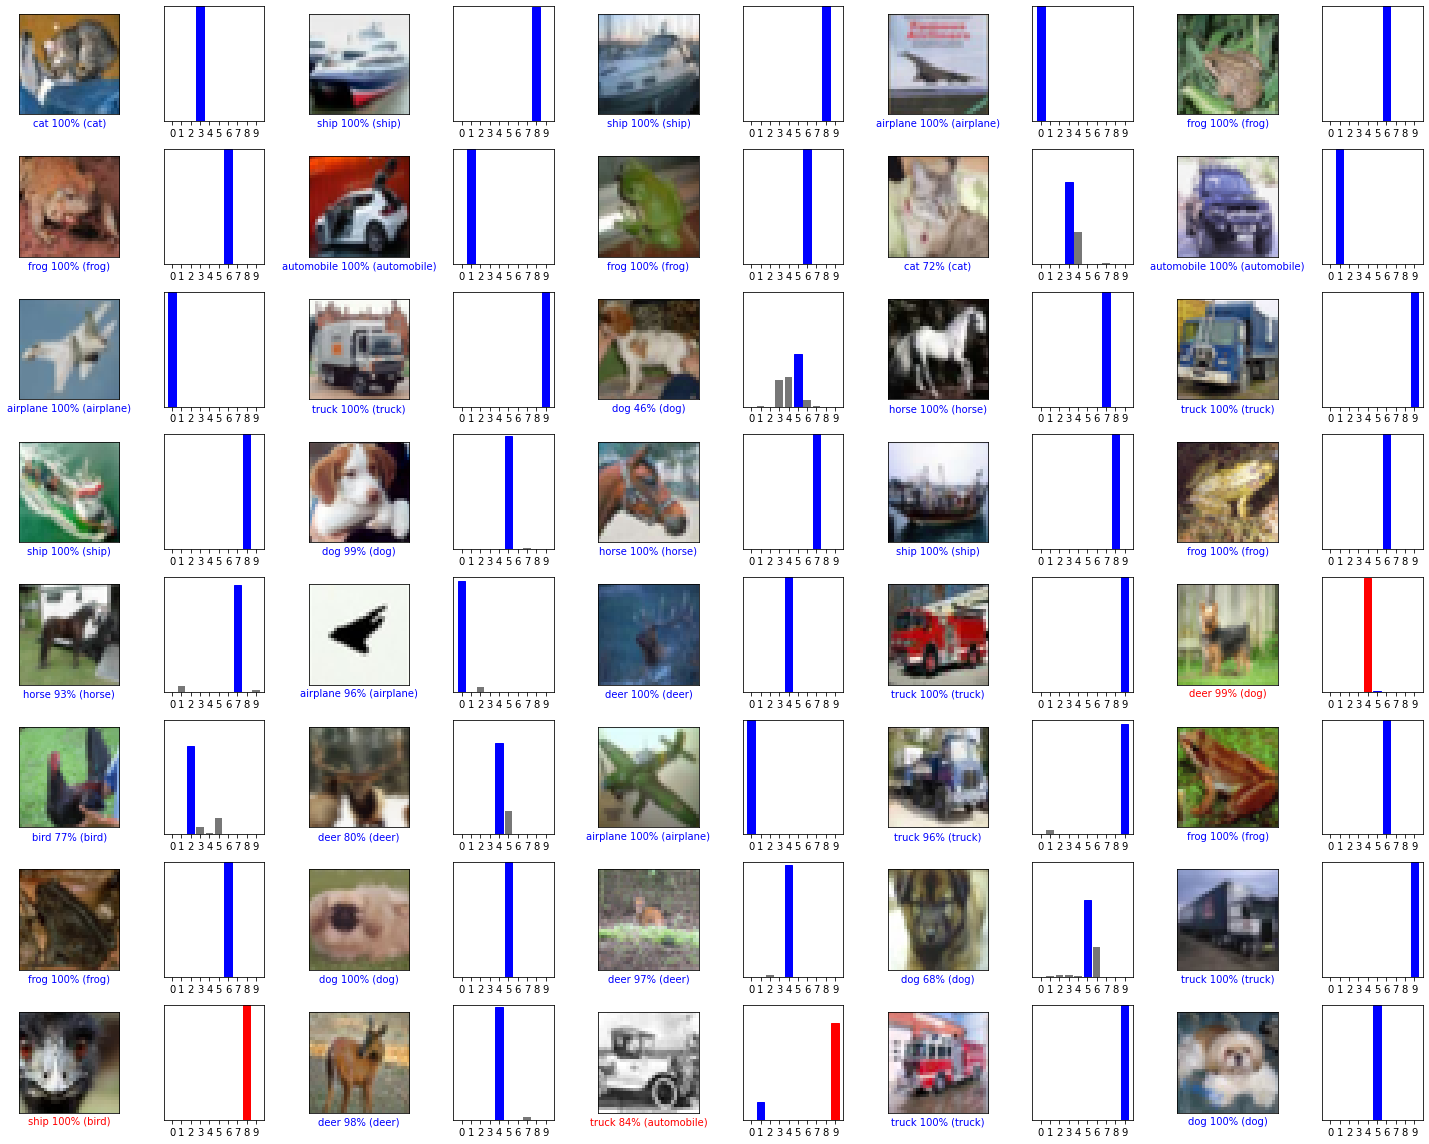

In [48]:
# The predictions which are correct are colored in blue and the wrong or incorrect predictions are in red.
# Ploting the first X test images, their predicted labels, and the true labels.
num_rows = 8
num_cols = 5
num_images = num_rows * num_cols
plt.figure(figsize=(2 * 2 * num_cols, 2 * num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2 * num_cols, 2 * i + 1)
    plot_image(i, predictions[i], y_test, X_test)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions[i], y_test)
plt.tight_layout()
plt.show()

Save the models

In [50]:
from tensorflow.keras.models import load_model

model.save('densenet_epochs.h5')